# Sales analysis

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("advertising.csv")

In [3]:
data.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
import seaborn as sns

C:\Users\Hi\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
c=data.corr()

<AxesSubplot:>

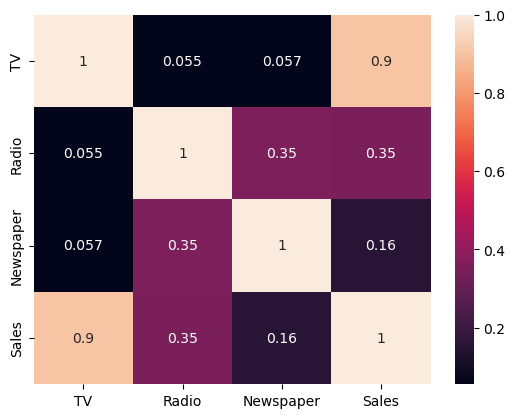

In [6]:
sns.heatmap(c,annot=True)

This heatmap depicts the correlation between all the cariables in the dataset.
All the independent variables are in positive correlation with Sales variable.

In [7]:
import matplotlib.pyplot as plt

In [8]:
data.dropna(inplace=True)

In [9]:
data_y=data['Sales']

In [10]:
data.drop(['Sales'],axis=1,inplace=True)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr=LinearRegression()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(data,data_y,test_size=0.3,random_state=41)

In [17]:
lr.fit(x_train,y_train)

LinearRegression()

In [18]:
y_prediction=lr.predict(x_test)

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
print("The mean squared error of the model is ",mean_squared_error(y_test,y_prediction))

The mean squared error of the model is  2.681312113671713


# PLOTTING THE BEST FIT LINE FROM LINEAR REGRESSION

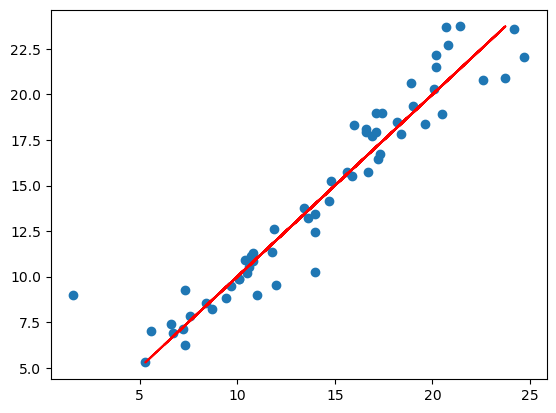

In [29]:
plt.scatter(y_test,y_prediction)
plt.plot(y_prediction,y_prediction,color="red")

# Automated function for predicting and plotting best fit line

In [39]:
def predict_sales(x,y,ml_model):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
    ml_model.fit(x_train,y_train)
    y_prediction=ml_model.predict(x_test)
    print("the mean squared error is ",mean_squared_error(y_prediction,y_test))
    plt.scatter(y_test,y_prediction,color="yellow")
    plt.plot(y_prediction,y_prediction,color="red")
    

the mean squared error is  4.334534976908163


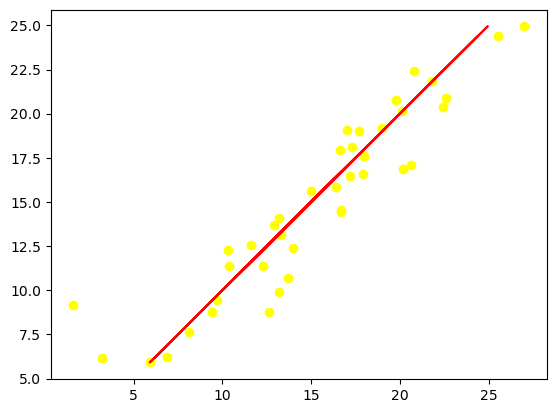

In [40]:
predict_sales(data,data_y,lr)

In [44]:
def predict_sales_for_input(radio,tv,newspaper):
    res=[]
    res.append(radio)
    res.append(tv)
    res.append(newspaper)
    res_np=np.asarray(res)
    res_np_reshape=res_np.reshape(1,-1)
    sales=lr.predict(res_np_reshape)
    print("The sales for given input",sales)

In [45]:
predict_sales_for_input(10,20,30)

The sales for given input [7.35112123]


C:\Users\Hi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Hence the sales are predicted with linear_regression